In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# LOADING THE DATA 

The project consists of pedicting for RHOB(Bulk density of formations using well logs from the Conger E9-i in the Moran field,located in the Allen County in Kansas state USA. A test well being the same field but a different block called with the well name being KNOX V10-i

In [17]:
log1=pd.read_csv('C:/Users/Paa Kwasi/Desktop/Python Notebooks/CONGER # E9-i.csv')

In [18]:
log1=log1.dropna()

# EXPLORING THE DATA

In [19]:
log1.corr()

DEPTH  CASEOD  MATRXDEN      ABHV      DCAL      DPOR        GR  \
DEPTH     1.000000     NaN       NaN -0.999857 -0.491469  0.069089  0.164571   
CASEOD         NaN     NaN       NaN       NaN       NaN       NaN       NaN   
MATRXDEN       NaN     NaN       NaN       NaN       NaN       NaN       NaN   
ABHV     -0.999857     NaN       NaN  1.000000  0.483458 -0.068217 -0.163998   
DCAL     -0.491469     NaN       NaN  0.483458  1.000000  0.206257 -0.043771   
DPOR      0.069089     NaN       NaN -0.068217  0.206257  1.000000  0.364345   
GR        0.164571     NaN       NaN -0.163998 -0.043771  0.364345  1.000000   
NPOR      0.364823     NaN       NaN -0.364665 -0.091669  0.459726  0.357000   
RHOB     -0.069087     NaN       NaN  0.068215 -0.206257 -1.000000 -0.364337   
RHOC      0.328787     NaN       NaN -0.325577 -0.151044  0.012570  0.032424   
SCAL     -0.193528     NaN       NaN  0.190625  0.648892  0.295470  0.006989   

              NPOR      RHOB      RHOC      SCAL  
DEPTH     0.364823 -0.069087  0.328787 -0.193528  
CASEOD         NaN       NaN       NaN       NaN  
MATRXDEN       NaN       NaN       NaN       NaN  
ABHV     -0.364665  0.068215 -0.325577  0.190625  
DCAL     -0.091669 -0.206257 -0.151044  0.648892  
DPOR      0.459726 -1.000000  0.012570  0.295470  
GR        0.357000 -0.364337  0.032424  0.006989  
NPOR      1.000000 -0.459725  0.189474  0.013521  
RHOB     -0.459725  1.000000 -0.012578 -0.295477  
RHOC      0.189474 -0.012578  1.000000  0.114575  
SCAL      0.013521 -0.295477  0.114575  1.000000

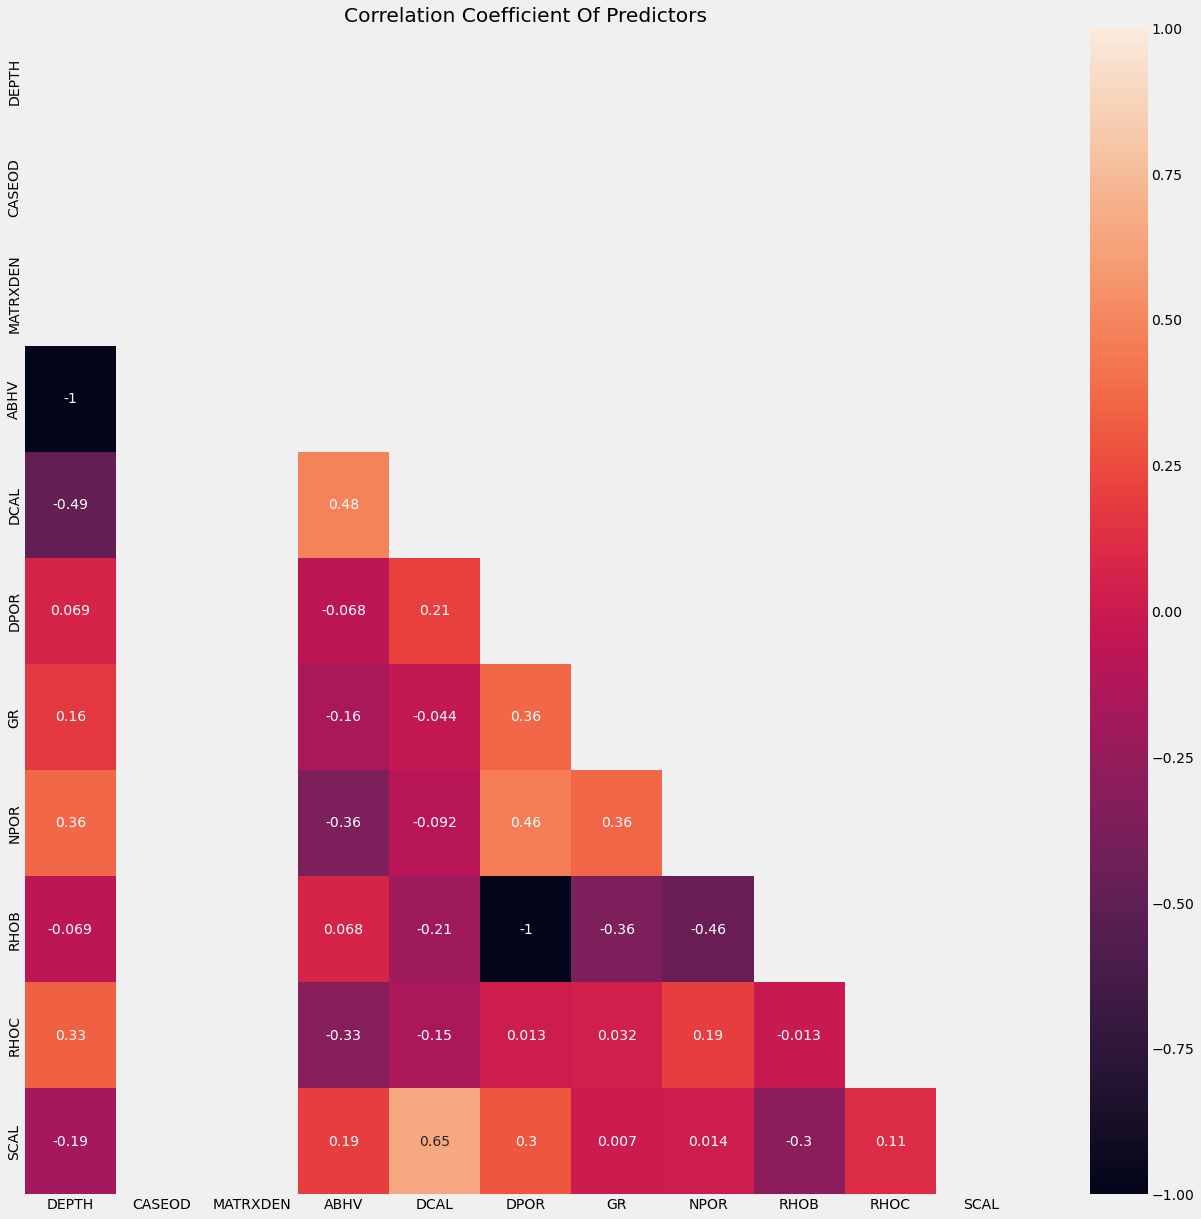

In [20]:
mask = np.triu(np.ones_like(log1.corr(), dtype=bool))
plt.figure(figsize=(20,20))
# generate heatmap
sns.heatmap(log1.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Based on the principle of collinearity ABHV will be dropped. since RHOB is the target variable DPOR will stay.
CASEOD and MATRXDEN will also be dropped since it does not show any relationship with any of the well logs.

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.71 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.5 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Paa Kwa

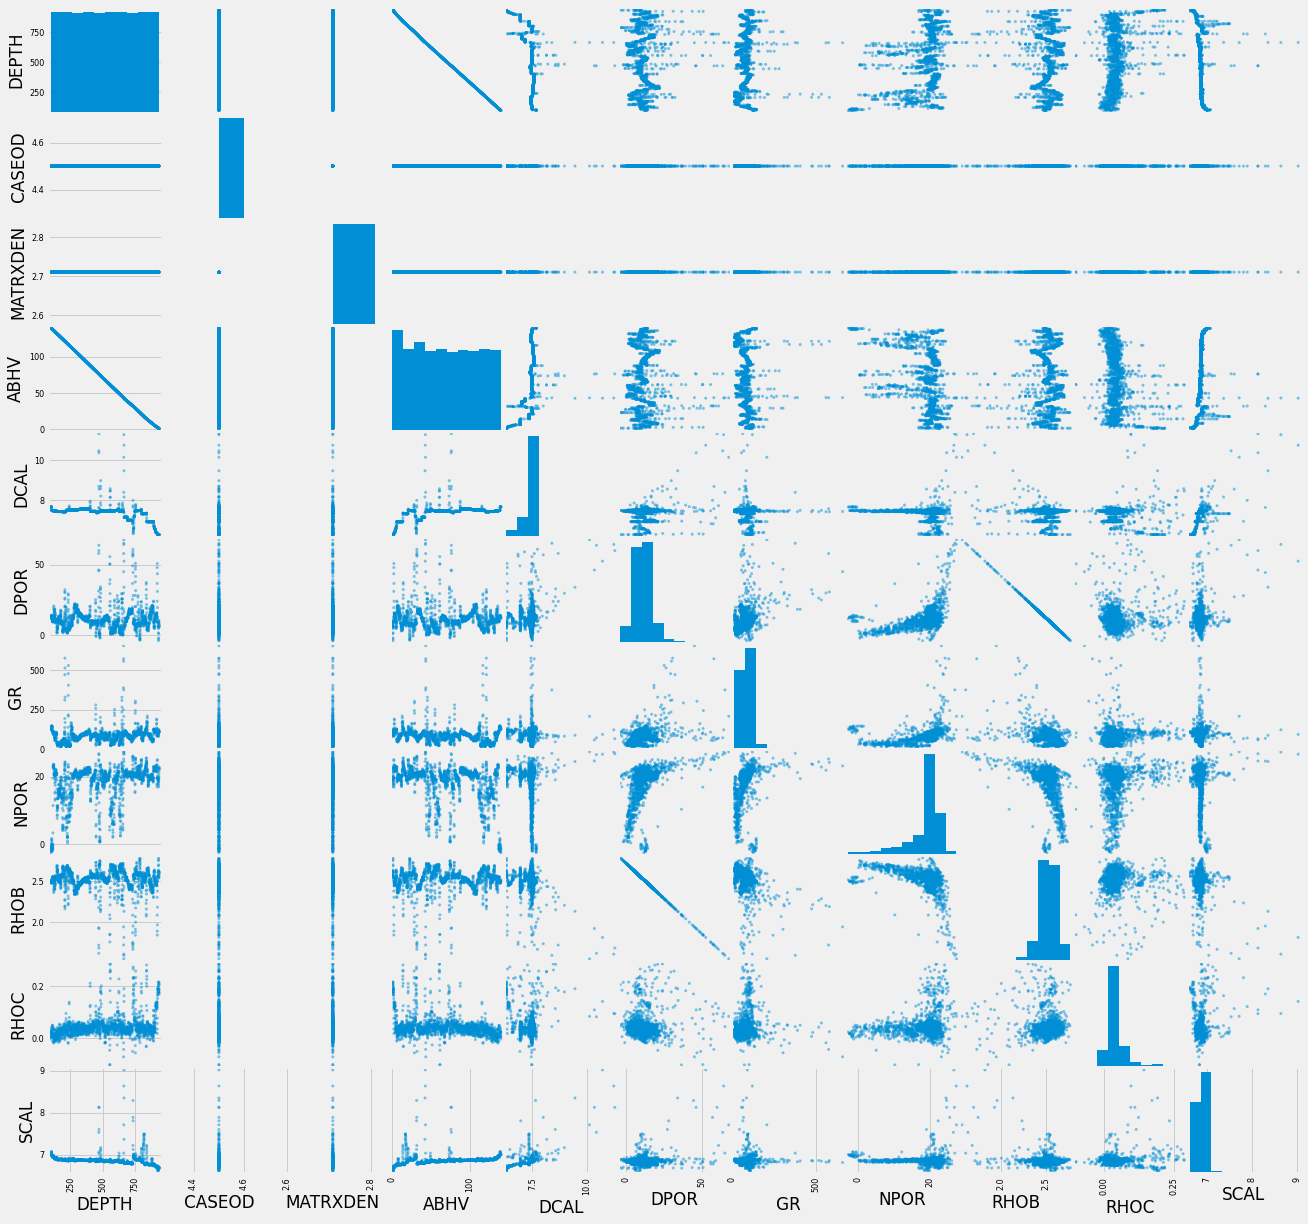

In [21]:
pd.plotting.scatter_matrix(log1,figsize=(20,20))
plt.show()

In [22]:
log1

DEPTH  CASEOD  MATRXDEN      ABHV    DCAL     DPOR        GR     NPOR  \
36    936.0     4.5      2.71    0.9028  6.3054   7.1914  110.4512  22.0800   
37    935.5     4.5      2.71    0.9623  6.3063   6.2088  110.3724  22.3026   
38    935.0     4.5      2.71    1.0218  6.3032   5.6302  108.5723  22.6259   
39    934.5     4.5      2.71    1.0815  6.2992   6.3913  106.5789  22.8044   
40    934.0     4.5      2.71    1.1413  6.2955   8.1731  112.9968  22.4601   
...     ...     ...       ...       ...     ...      ...       ...      ...   
1708  100.0     4.5      2.71  139.5710  7.6687  12.3670  123.6880  -2.2730   
1709   99.5     4.5      2.71  139.6622  7.6689  12.7461  128.5129  -1.7117   
1710   99.0     4.5      2.71  139.7535  7.6679  12.8897  135.0469  -1.0992   
1711   98.5     4.5      2.71  139.8448  7.6681  12.3707  134.0216  -1.4708   
1712   98.0     4.5      2.71  139.9361  7.6696  11.4645  128.3770  -2.6603   

        RHOB    RHOC    SCAL  
36    2.5870  0.1705  6.6838  
37    2.6038  0.1865  6.6750  
38    2.6137  0.2089  6.6756  
39    2.6007  0.2159  6.6866  
40    2.5702  0.2076  6.6985  
...      ...     ...     ...  
1708  2.4985  0.0188  7.0008  
1709  2.4920  0.0073  7.0049  
1710  2.4896 -0.0028  7.0064  
1711  2.4985  0.0051  7.0059  
1712  2.5140  0.0246  7.0042  

[1677 rows x 11 columns]

In [23]:
log1.describe()

DEPTH  CASEOD      MATRXDEN         ABHV         DCAL  \
count  1677.000000  1677.0  1.677000e+03  1677.000000  1677.000000   
mean    517.000000     4.5  2.710000e+00    68.553910     7.372232   
std     242.126258     0.0  3.109552e-14    40.842214     0.371529   
min      98.000000     4.5  2.710000e+00     0.902800     6.294400   
25%     307.500000     4.5  2.710000e+00    33.021700     7.341400   
50%     517.000000     4.5  2.710000e+00    67.893100     7.463800   
75%     726.500000     4.5  2.710000e+00   104.087800     7.504100   
max     936.000000     4.5  2.710000e+00   139.936100    11.299800   

              DPOR           GR         NPOR         RHOB         RHOC  \
count  1677.000000  1677.000000  1677.000000  1677.000000  1677.000000   
mean     11.710726    86.894529    18.181780     2.509747     0.046250   
std       7.996322    50.631980     5.360757     0.136737     0.043676   
min      -4.097100    15.254500    -2.660300     1.554200    -0.101800   
25%       7.605700    62.372400    17.285600     2.471600     0.024800   
50%      10.696700    85.860600    20.083800     2.527100     0.038000   
75%      13.944200   102.070000    21.213000     2.579900     0.051700   
max      67.588300   657.155600    27.361600     2.780100     0.286500   

              SCAL  
count  1677.000000  
mean      6.867950  
std       0.132727  
min       6.616100  
25%       6.832600  
50%       6.866200  
75%       6.881100  
max       9.020200

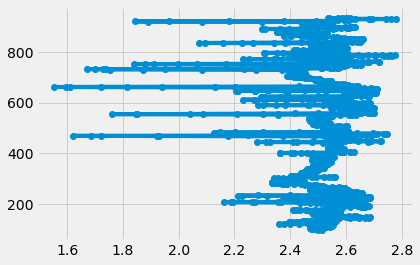

In [24]:
plt.plot(log1['RHOB'], log1['DEPTH'],marker='o')


# REMOVING THE NOISE AND OUTLIERS IN THE LOG 

<AxesSubplot:xlabel='RHOB'>

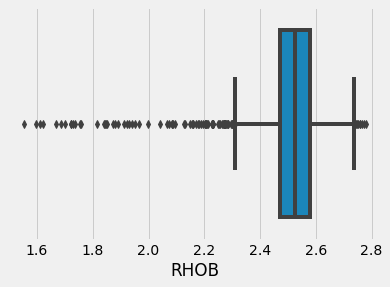

In [25]:
sns.boxplot(data=log1,x=log1['RHOB'])

In [26]:
log1=log1[(log1['RHOB']>2.35)&(log1['RHOB']<2.7)]

In [27]:
log1

DEPTH  CASEOD  MATRXDEN      ABHV    DCAL     DPOR        GR     NPOR  \
36    936.0     4.5      2.71    0.9028  6.3054   7.1914  110.4512  22.0800   
37    935.5     4.5      2.71    0.9623  6.3063   6.2088  110.3724  22.3026   
38    935.0     4.5      2.71    1.0218  6.3032   5.6302  108.5723  22.6259   
39    934.5     4.5      2.71    1.0815  6.2992   6.3913  106.5789  22.8044   
40    934.0     4.5      2.71    1.1413  6.2955   8.1731  112.9968  22.4601   
...     ...     ...       ...       ...     ...      ...       ...      ...   
1708  100.0     4.5      2.71  139.5710  7.6687  12.3670  123.6880  -2.2730   
1709   99.5     4.5      2.71  139.6622  7.6689  12.7461  128.5129  -1.7117   
1710   99.0     4.5      2.71  139.7535  7.6679  12.8897  135.0469  -1.0992   
1711   98.5     4.5      2.71  139.8448  7.6681  12.3707  134.0216  -1.4708   
1712   98.0     4.5      2.71  139.9361  7.6696  11.4645  128.3770  -2.6603   

        RHOB    RHOC    SCAL  
36    2.5870  0.1705  6.6838  
37    2.6038  0.1865  6.6750  
38    2.6137  0.2089  6.6756  
39    2.6007  0.2159  6.6866  
40    2.5702  0.2076  6.6985  
...      ...     ...     ...  
1708  2.4985  0.0188  7.0008  
1709  2.4920  0.0073  7.0049  
1710  2.4896 -0.0028  7.0064  
1711  2.4985  0.0051  7.0059  
1712  2.5140  0.0246  7.0042  

[1546 rows x 11 columns]

<AxesSubplot:xlabel='RHOB'>

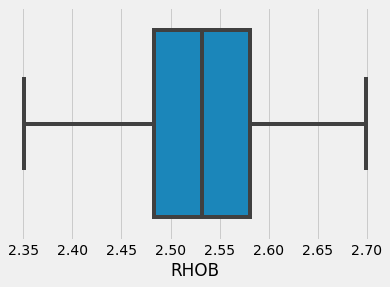

In [28]:
sns.boxplot(data=log1,x=log1['RHOB'])

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.71 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.5 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Paa Kwa

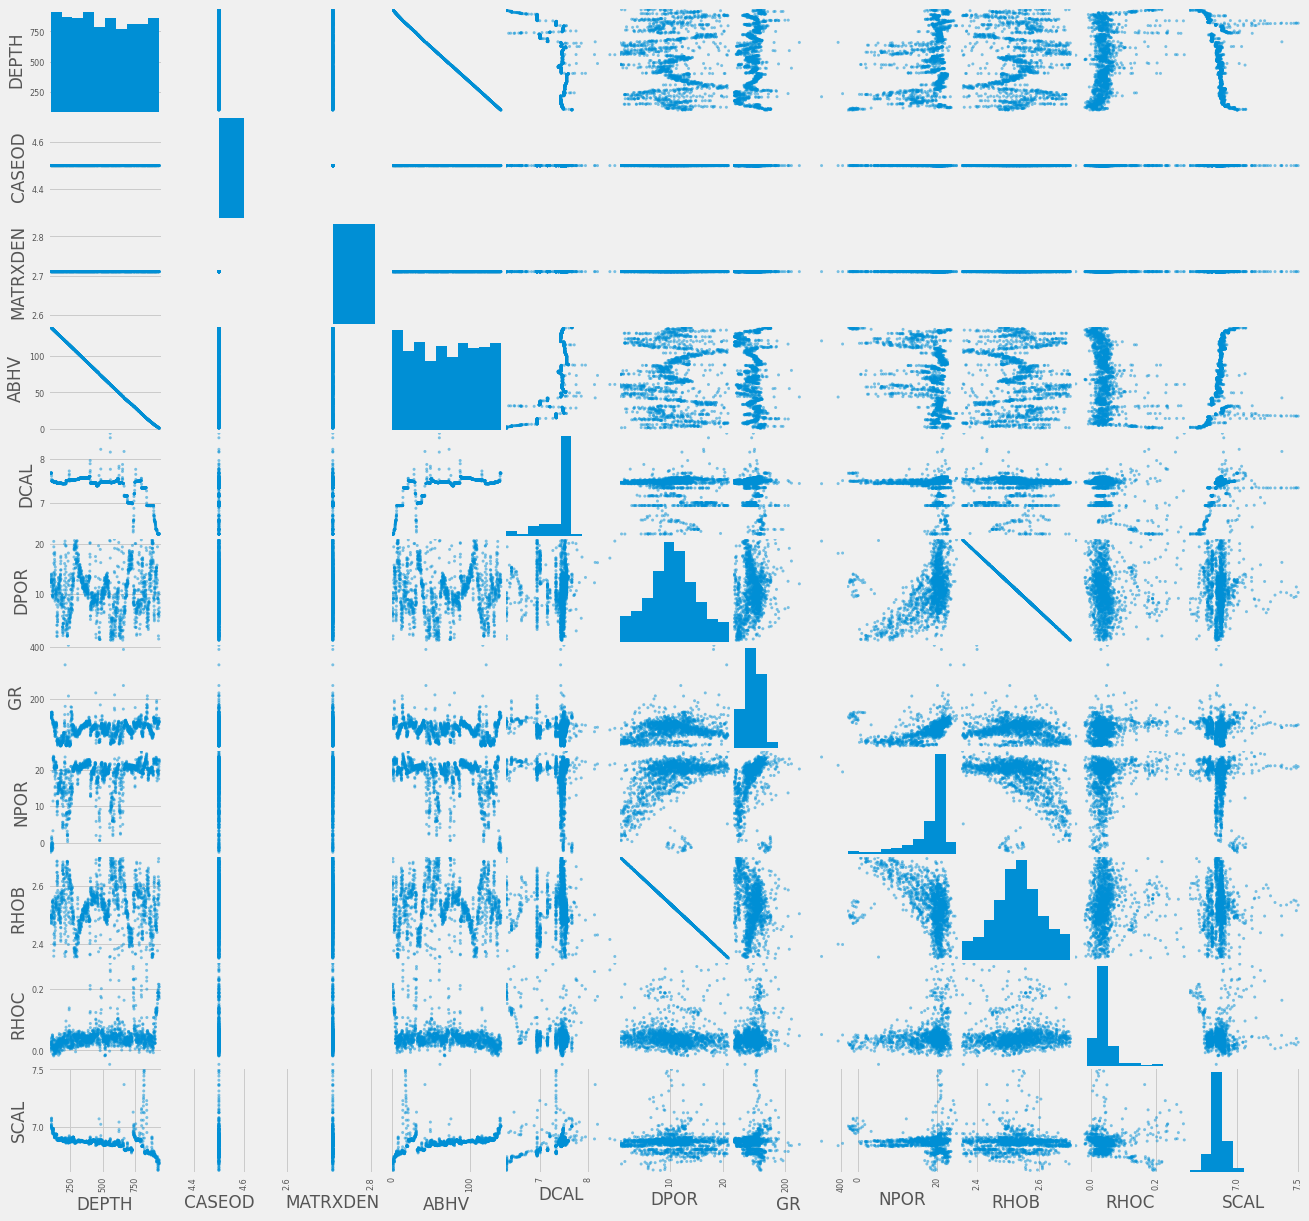

In [455]:
pd.plotting.scatter_matrix(log1,figsize=(20,20))
plt.show()

In [456]:
log1.to_csv('Cleaned Conger E9-i')

In [457]:
log1.columns

Index(['DEPTH', 'CASEOD', 'MATRXDEN', 'ABHV', 'DCAL', 'DPOR', 'GR', 'NPOR',
       'RHOB', 'RHOC', 'SCAL'],
      dtype='object')

In [31]:
X=log1[['DEPTH','DPOR','GR','NPOR']]
y=log1['RHOB']
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
lr.score(X_train,y_train)

0.9999998573317574

In [35]:
lr.score(X_test,y_test)

0.9999998531978517

In [463]:
X_test

DEPTH     DPOR        GR     NPOR
1091  408.5   7.7559   83.1426  16.9937
731   588.5   8.4062   52.2955  11.6672
1073  417.5   8.4847   83.2773  19.1932
1428  240.0  12.7368   73.0894  19.6700
247   830.5  10.7589  116.0715  22.6090
...     ...      ...       ...      ...
268   820.0  12.4496   87.5489  20.6385
182   863.0  11.4889   89.4689  19.7124
564   672.0   6.8506  114.4295  21.0451
644   632.0   2.8981   49.1882   9.6356
873   517.5  10.1202   89.6642  21.7035

[387 rows x 4 columns]

In [49]:
l2=pd.read_csv('C:/Users/Paa Kwasi/Desktop/Python Notebooks/test_well.csv')

In [50]:
l2=l2.dropna()
l2

Unnamed: 0.5  Unnamed: 0.4  Unnamed: 0.3  Unnamed: 0.2  Unnamed: 0.1  \
0               0             0             0             0             0   
1               1             1             1             1             1   
2               2             2             2             2             2   
3               3             3             3             3             3   
4               4             4             4             4             4   
..            ...           ...           ...           ...           ...   
799           799           799           799           799           799   
800           800           800           800           800           800   
801           801           801           801           801           801   
802           802           802           802           802           802   
803           803           803           803           803           803   

     Unnamed: 0  DEPTH  CASEOD  MATRXDEN      ABHV    DCAL     DPOR        GR  \
0            40  928.5     4.5      2.71    1.2810  6.6277  14.6391   61.8289   
1            41  928.0     4.5      2.71    1.3489  6.6330  13.2162   77.2405   
2            42  927.5     4.5      2.71    1.4161  6.6312  11.7161   91.2280   
3            43  927.0     4.5      2.71    1.4824  6.6025   9.7778  104.0355   
4            49  924.0     4.5      2.71    1.8704  6.3903  11.8417   93.3697   
..          ...    ...     ...       ...       ...     ...      ...       ...   
799        1703   97.0     4.5      2.71  122.8874  7.1753  11.6596  140.5782   
800        1704   96.5     4.5      2.71  122.9714  7.1951  11.4936  146.5816   
801        1705   96.0     4.5      2.71  123.0554  7.2136  11.2927  150.9428   
802        1706   95.5     4.5      2.71  123.1393  7.2185  11.4216  151.4264   
803        1707   95.0     4.5      2.71  123.2230  7.2167  11.8092  145.8625   

        NPOR    RHOB    RHOC    SCAL  
0    20.0917  2.4597  0.0415  6.8487  
1    20.3549  2.4840  0.0413  6.8039  
2    20.4609  2.5097  0.0496  6.7737  
3    20.3956  2.5428  0.0683  6.7468  
4    21.5868  2.5075  0.1804  6.8720  
..       ...     ...     ...     ...  
799   2.0420  2.5106  0.0290  7.0859  
800   2.5688  2.5135  0.0268  7.0938  
801   3.2280  2.5169  0.0312  7.0796  
802   3.0409  2.5147  0.0310  7.0645  
803   2.3900  2.5081  0.0211  7.0609  

[804 rows x 17 columns]

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.71 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.5 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Paa Kwa

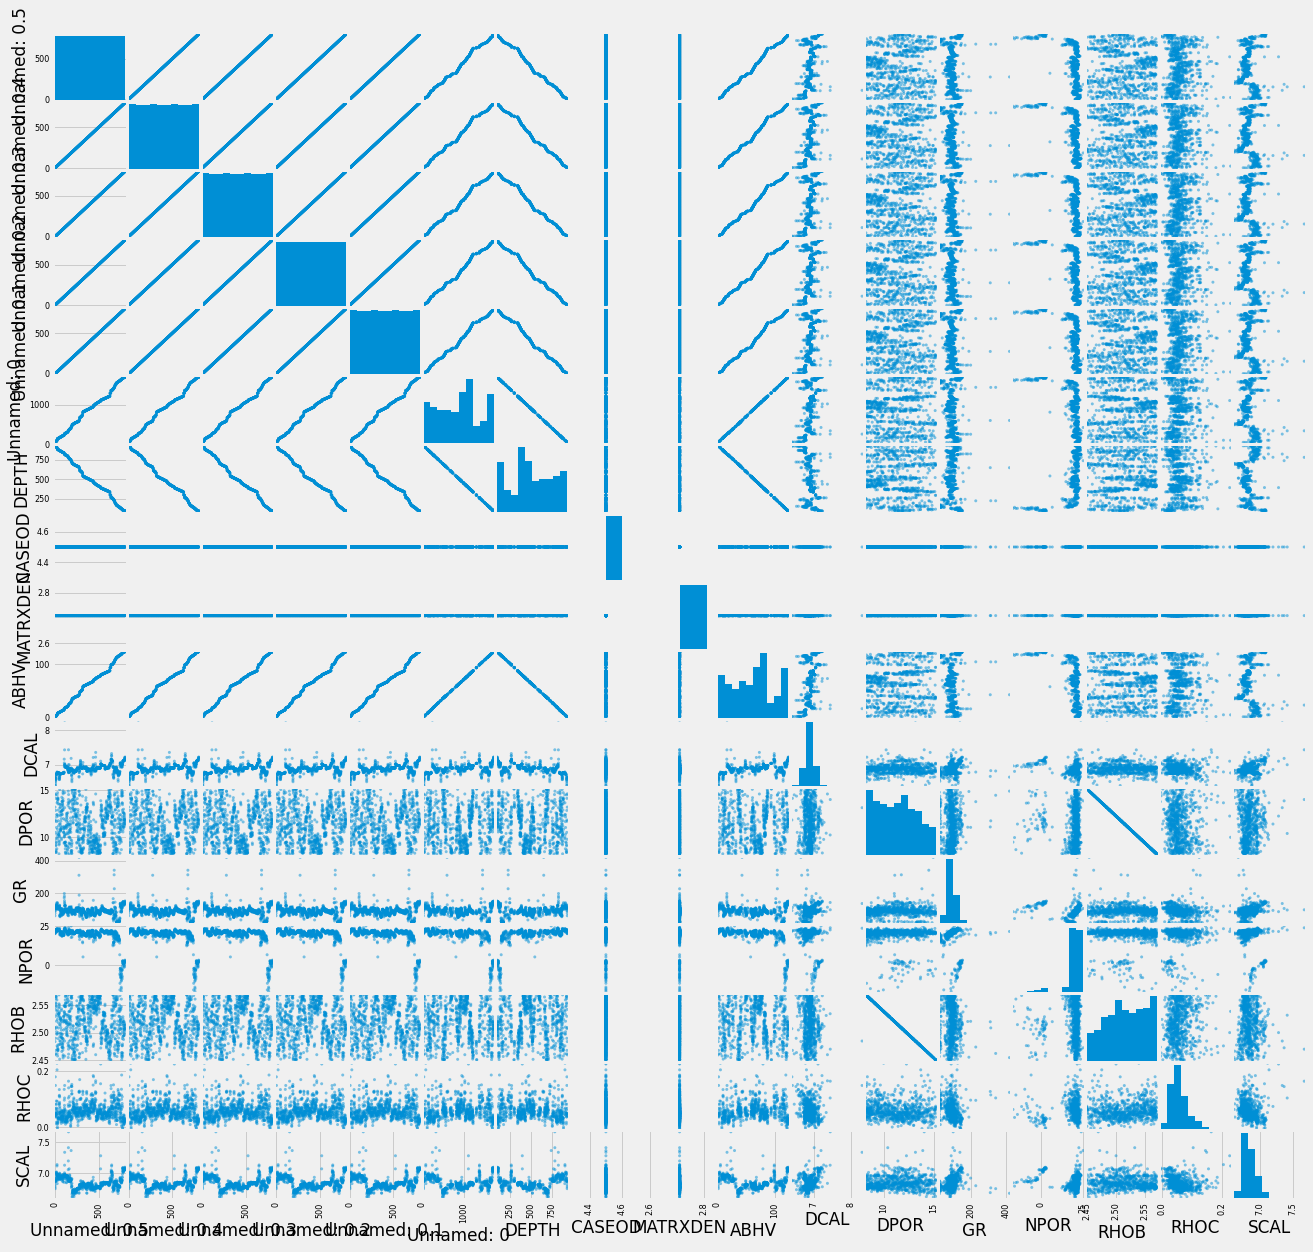

In [51]:
pd.plotting.scatter_matrix(l2,figsize=(20,20))
plt.show()

In [52]:
l2=l2[(l2['RHOB']>2.45)&(l2['RHOB']<2.57)]
l2
l2.to_csv('Test_well.csv')

In [53]:
l2=l2.rename(columns={'DEPT':'DEPTH'})

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 2.71 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 4.5 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 4.5 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
C:\Users\Paa Kwa

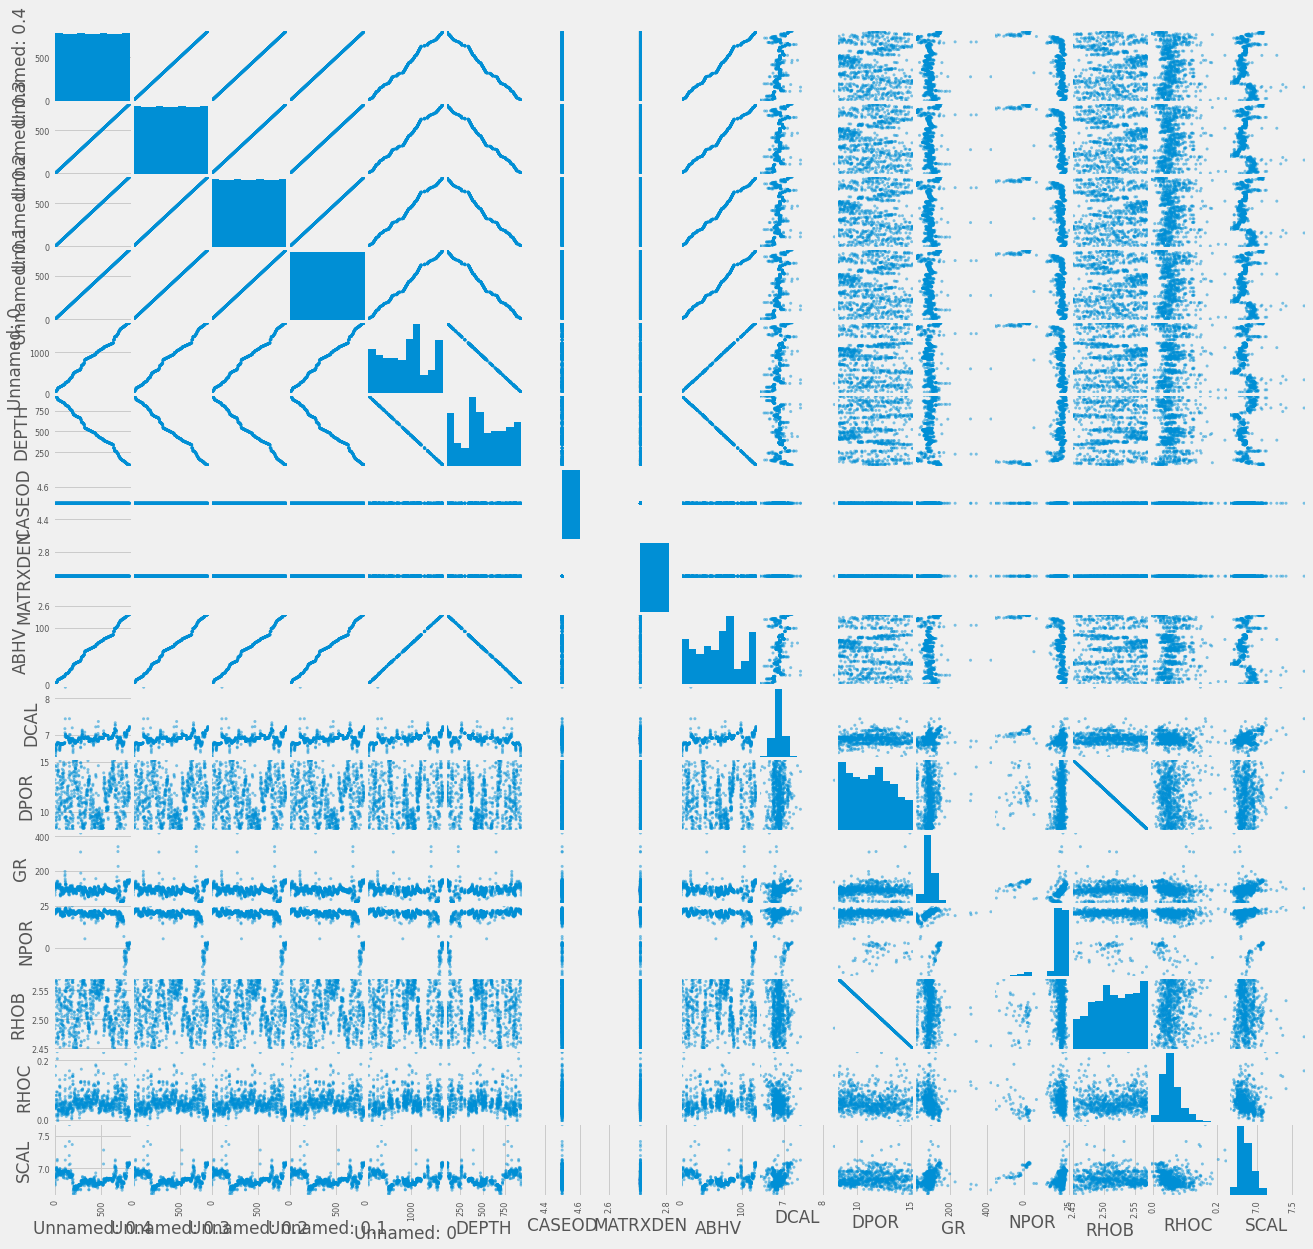

In [469]:
pd.plotting.scatter_matrix(l2,figsize=(20,20))
plt.show()

In [470]:
Xt=l2[['DEPTH','DPOR','GR','NPOR']]
yt=l2['RHOB']
lr.score(Xt,yt)

0.9999992469348779

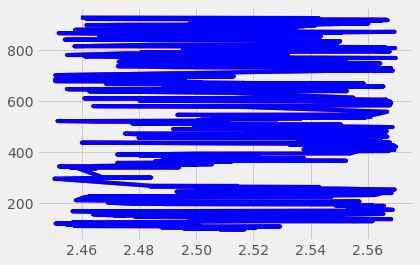

In [471]:
plt.plot(l2['RHOB'],l2['DEPTH'],'red')
plt.plot(lr.predict(Xt),l2['DEPTH'],'blue')

In [472]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [473]:
xgb.score(X_train,y_train)

0.9999308210196582

In [474]:
xgb.score(X_test,y_test)

0.9998398625657541

In [475]:
xgb.score(Xt,yt)

0.9995315079434611

In [476]:
from sklearn.svm import SVR
svr=SVR(kernel='linear',C=0.5)
svr.fit(X_train,y_train)

SVR(C=0.5, kernel='linear')

In [477]:
svr.score(X_train,y_train)

0.6597886316347285

In [478]:
svr.score(X_test,y_test)

0.6548518462786128

# Tuning with Linear Regression 

In [479]:
np.set_printoptions(precision=8)
mse_train=[]
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_test_well=[]
random_state=[x for x in range(11)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    from sklearn.linear_model import LinearRegression
    lr=LinearRegression().fit(X_train,y_train)
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    test_well_score.append(lr.score(Xt,yt))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    mse_test_well.append(mean_squared_error(lr.predict(Xt),yt))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df3=pd.DataFrame(test_well_score, columns=['Test_well_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df6=pd.DataFrame(mse_test_well, columns=['Test_well_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df3,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df6,'outer', left_index=True,right_index=True)

# Investigating the Stability of the data against the random state 

In [480]:
df

Train_score  Test_score  Test_well_score   Train_error    Test_error  \
0           1.0         1.0         0.999999  8.224927e-10  9.027918e-10   
1           1.0         1.0         0.999999  8.309234e-10  8.748375e-10   
2           1.0         1.0         0.999999  8.192749e-10  9.108348e-10   
3           1.0         1.0         0.999999  8.384100e-10  8.519309e-10   
4           1.0         1.0         0.999999  8.509012e-10  8.130875e-10   
5           1.0         1.0         0.999999  8.358802e-10  8.606125e-10   
6           1.0         1.0         0.999999  8.287932e-10  8.813703e-10   
7           1.0         1.0         0.999999  8.237014e-10  8.956545e-10   
8           1.0         1.0         0.999999  8.433573e-10  8.414938e-10   
9           1.0         1.0         0.999999  8.447431e-10  8.342484e-10   
10          1.0         1.0         0.999999  8.339426e-10  8.694911e-10   

    Test_well_error  
0      8.159885e-10  
1      8.206390e-10  
2      8.233260e-10  
3      8.142439e-10  
4      8.175825e-10  
5      8.164645e-10  
6      8.183602e-10  
7      8.170467e-10  
8      8.190544e-10  
9      8.194592e-10  
10     8.206870e-10

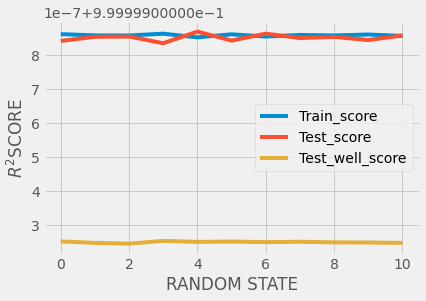

In [481]:
plt.figure()
plt.plot(df.index,df.Train_score,label='Train_score')
plt.plot(df.index,df.Test_score,label='Test_score')
plt.plot(df.index,df.Test_well_score,label='Test_well_score')
plt.legend()
plt.xlabel('RANDOM STATE')
plt.ylabel('$R^2$SCORE')
plt.show()

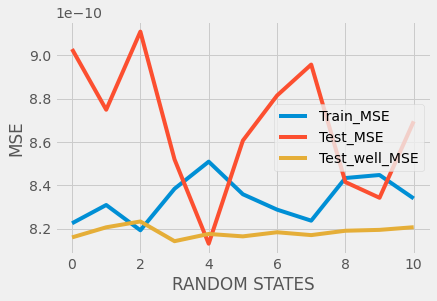

In [482]:
plt.plot(df.index,df.Train_error,label='Train_MSE')
plt.plot(df.index,df.Test_error,label='Test_MSE')
plt.plot(df.index,df.Test_well_error,label='Test_well_MSE')
plt.legend()
plt.xlabel('RANDOM STATES')
plt.ylabel('MSE')
plt.show()

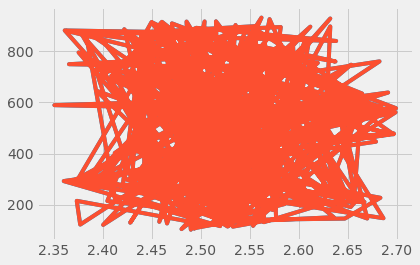

In [483]:
plt.plot(y_test,X_test.DEPTH)
plt.plot(lr.predict(X_test),X_test.DEPTH)
plt.show()

# Testing with XGBOOST.

Seems like the data is fairly stable


In [484]:
np.set_printoptions(precision=8)
mse_train=[]
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_test_well=[]
random_state=[x for x in range(11)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    from xgboost import XGBRegressor
    lr=XGBRegressor().fit(X_train,y_train)
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    test_well_score.append(lr.score(Xt,yt))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    mse_test_well.append(mean_squared_error(lr.predict(Xt),yt))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df3=pd.DataFrame(test_well_score, columns=['Test_well_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df6=pd.DataFrame(mse_test_well, columns=['Test_well_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df3,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df6,'outer', left_index=True,right_index=True)

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Paa Kwasi\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pa

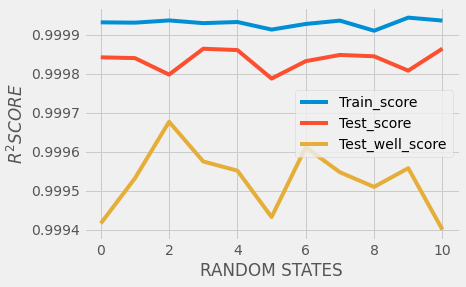

In [485]:
plt.figure()
plt.plot(df.index,df.Train_score,label='Train_score')
plt.plot(df.index,df.Test_score,label='Test_score')
plt.plot(df.index,df.Test_well_score,label='Test_well_score')
plt.legend()
plt.xlabel('RANDOM STATES')
plt.ylabel('$R^2 SCORE$')
plt.show()

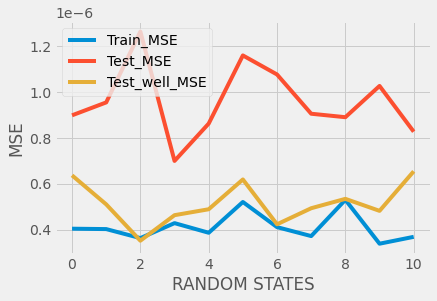

In [486]:
plt.plot(df.index,df.Train_error,label='Train_MSE')
plt.plot(df.index,df.Test_error,label='Test_MSE')
plt.plot(df.index,df.Test_well_error,label='Test_well_MSE')
plt.xlabel('RANDOM STATES')
plt.ylabel('MSE')
plt.legend()
plt.show()

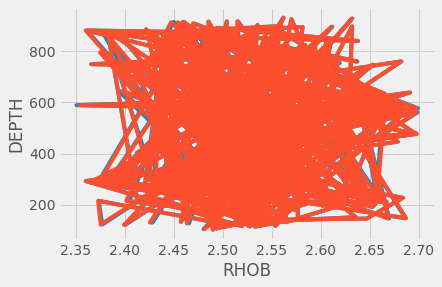

In [487]:
plt.plot(y_test,X_test.DEPTH)
plt.plot(lr.predict(X_test),X_test.DEPTH)
plt.xlabel('RHOB')
plt.ylabel('DEPTH')
plt.show()

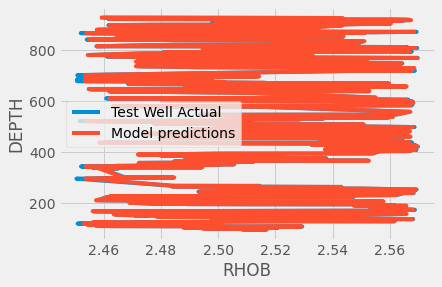

In [488]:
plt.plot(yt,Xt.DEPTH, label='Test Well Actual')
plt.plot(lr.predict(Xt),Xt.DEPTH, label='Model predictions')
plt.legend()
plt.xlabel('RHOB')
plt.ylabel('DEPTH')
plt.show()

XGBRegressor model performs well even without hyperparameter tunings.

# SVR test

In [489]:
np.set_printoptions(precision=8)
mse_train=[]
mse_test=[]
train_score=[]
test_score=[]
test_well_score=[]
mse_test_well=[]
random_state=[x for x in range(11)]
for i in random_state:
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error
    X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=i)
    from sklearn.svm import SVR
    lr=SVR().fit(X_train,y_train)
    train_score.append(lr.score(X_train,y_train))
    test_score.append(lr.score(X_test,y_test))
    test_well_score.append(lr.score(Xt,yt))
    mse_train.append(mean_squared_error(lr.predict(X_train),y_train))
    mse_test.append(mean_squared_error(lr.predict(X_test),y_test))
    mse_test_well.append(mean_squared_error(lr.predict(Xt),yt))
    df1=pd.DataFrame(train_score, columns=['Train_score'])
    df2=pd.DataFrame(test_score, columns=['Test_score'])
    df3=pd.DataFrame(test_well_score, columns=['Test_well_score'])
    df4=pd.DataFrame(mse_train, columns=['Train_error'])
    df5=pd.DataFrame(mse_test, columns=['Test_error'])
    df6=pd.DataFrame(mse_test_well, columns=['Test_well_error'])
    df=pd.merge(df1,df2,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df3,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df4,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df5,'outer', left_index=True,right_index=True)
    df=pd.merge(df,df6,'outer', left_index=True,right_index=True)

In [490]:
df

Train_score  Test_score  Test_well_score  Train_error  Test_error  \
0      0.458158    0.442000        -0.004042     0.003207    0.003170   
1      0.443734    0.451041        -0.038199     0.003240    0.003271   
2      0.432720    0.470107        -0.041035     0.003252    0.003305   
3      0.469459    0.384976        -0.039978     0.003232    0.003163   
4      0.462565    0.414850         0.052071     0.003081    0.003616   
5      0.451043    0.434551        -0.053350     0.003290    0.003082   
6      0.424732    0.464290        -0.097307     0.003265    0.003432   
7      0.449269    0.463729         0.009430     0.003209    0.003193   
8      0.458565    0.427835        -0.010677     0.003195    0.003275   
9      0.454499    0.457804        -0.008395     0.003291    0.002892   
10     0.444182    0.471933         0.044777     0.003213    0.003215   

    Test_well_error  
0          0.001094  
1          0.001131  
2          0.001134  
3          0.001133  
4          0.001033  
5          0.001148  
6          0.001196  
7          0.001079  
8          0.001101  
9          0.001099  
10         0.001041

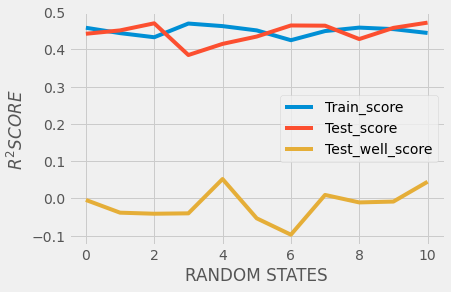

In [491]:
plt.figure()
plt.plot(df.index,df.Train_score,label='Train_score')
plt.plot(df.index,df.Test_score,label='Test_score')
plt.plot(df.index,df.Test_well_score,label='Test_well_score')
plt.legend()
plt.xlabel('RANDOM STATES')
plt.ylabel('$R^2 SCORE$')
plt.show()

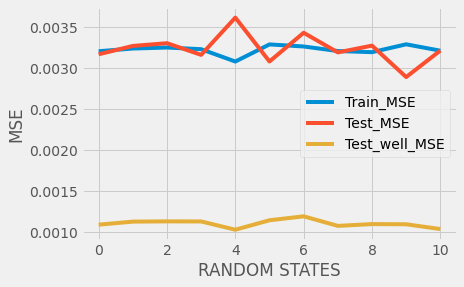

In [492]:
plt.plot(df.index,df.Train_error,label='Train_MSE')
plt.plot(df.index,df.Test_error,label='Test_MSE')
plt.plot(df.index,df.Test_well_error,label='Test_well_MSE')
plt.xlabel('RANDOM STATES')
plt.ylabel('MSE')
plt.legend()
plt.show()

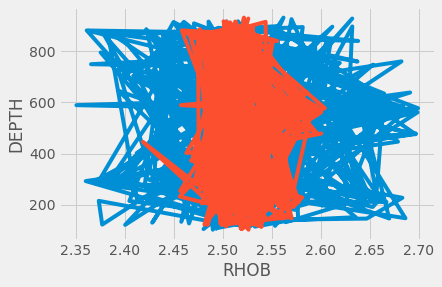

In [493]:
plt.plot(y_test,X_test.DEPTH)
plt.plot(lr.predict(X_test),X_test.DEPTH)
plt.xlabel('RHOB')
plt.ylabel('DEPTH')
plt.show()

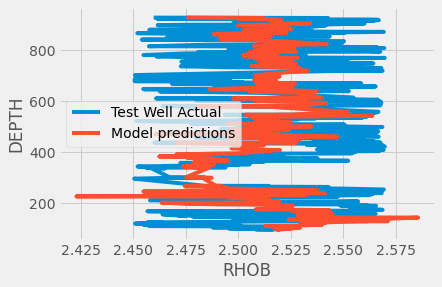

In [494]:
plt.plot(yt,Xt.DEPTH, label='Test Well Actual')
plt.plot(lr.predict(Xt),Xt.DEPTH, label='Model predictions')
plt.legend()
plt.xlabel('RHOB')
plt.ylabel('DEPTH')
plt.show()

SVR is performing poorly on the original data set even before regularizing, seems to be a high bias instance

Ways to solve use smaller C since C=$\frac{1}{\lambda}$
Increase training examples to get a bit of complex functions but in this case training examples of the logs is large enough

# Further test on more wells 

In [37]:
knox=pd.read_csv("C:/Users/Paa Kwasi/Desktop/Python Notebooks/Knox # V10-i.csv")

In [38]:
knox.dropna(inplace=True)

In [40]:
xk=knox[['DEPT','DPOR','GR','NPOR']]

In [41]:
yk=knox['RHOB']

In [42]:
lr.score(xk,yk)

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DEPT
Feature names seen at fit time, yet now missing:
- DEPTH

  warnings.warn(message, FutureWarning)


0.9999999382069095

In [45]:
baker=pd.read_csv("C:/Users/Paa Kwasi/Desktop/Python Notebooks/baker.csv").dropna()

In [46]:
baker

DEPT  CASEOD  MATRXDEN      ABHV    DCAL     DPOR       GR     NPOR  \
36    1067.5     4.5      2.71    1.0295  6.7240  21.9722  50.6193  19.9305   
37    1067.0     4.5      2.71    1.0971  6.7250  21.8231  53.6180  20.2189   
38    1066.5     4.5      2.71    1.1647  6.7264  20.9729  55.6290  19.9805   
39    1066.0     4.5      2.71    1.2323  6.7274  19.7146  51.7719  19.0706   
40    1065.5     4.5      2.71    1.2999  6.7266  18.9152  47.5948  18.2493   
...      ...     ...       ...       ...     ...      ...      ...      ...   
2037    67.0     4.5      2.71  151.7793  6.8588   3.5332  46.2483 -29.5319   
2038    66.5     4.5      2.71  151.8533  6.8542   4.2763  43.0258 -31.1957   
2039    66.0     4.5      2.71  151.9271  6.8480   4.8895  38.5460 -32.4699   
2040    65.5     4.5      2.71  152.0008  6.8387   5.2033  36.9731 -33.1773   
2041    65.0     4.5      2.71  152.0742  6.8278   5.2267  36.1426 -34.3344   

        RHOB    RHOC    SCAL  
36    2.3343  0.0109  6.6998  
37    2.3368  0.0130  6.6988  
38    2.3514  0.0339  6.6965  
39    2.3729  0.0524  6.6959  
40    2.3865  0.0501  6.6959  
...      ...     ...     ...  
2037  2.6496  0.0320  6.9108  
2038  2.6369  0.0308  6.9115  
2039  2.6264  0.0354  6.9128  
2040  2.6210  0.0319  6.9107  
2041  2.6206  0.0192  6.9057  

[2006 rows x 11 columns]

In [47]:
xb=baker[['DEPT','DPOR','GR','NPOR']]
yb=baker['RHOB']

In [48]:
lr.score(xb,yb)

C:\Users\Paa Kwasi\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- DEPT
Feature names seen at fit time, yet now missing:
- DEPTH

  warnings.warn(message, FutureWarning)


0.9999999476433848